In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_excel('Amz_Data.xlsx')
df.head()

,Name,Performance,IQ,Motivation,Annual Salary
0,Reetu Rani,85.0,109.0,89.0,73.0
1,Akshya,84.0,106.0,84.0,80.0
2,Akshya Bhatt,87.0,125.0,59.0,67.0
3,Dilip,69.0,84.0,60.0,58.0
4,Kiran Babu,69.0,89.0,60.0,67.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           61 non-null     object 
 1   Performance    61 non-null     float64
 2   IQ             60 non-null     float64
 3   Motivation     60 non-null     float64
 4   Annual Salary  60 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.5+ KB


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           60 non-null     object 
 1   Performance    60 non-null     float64
 2   IQ             60 non-null     float64
 3   Motivation     60 non-null     float64
 4   Annual Salary  60 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.8+ KB


In [5]:
df.describe()

,Performance,IQ,Motivation,Annual Salary
count,60.000000,60.000000,60.000000,60.000000
mean,78.116667,106.650000,66.950000,67.716667
std,8.027689,14.315838,13.586415,12.276603
min,62.000000,73.000000,32.000000,44.000000
25%,72.750000,97.750000,58.000000,58.000000
50%,78.500000,105.500000,65.500000,67.500000
75%,84.000000,112.250000,74.500000,76.500000
max,99.000000,145.000000,97.000000,93.000000


In [6]:
df.skew()

C:\Users\Dell\AppData\Local\Temp/ipykernel_10108/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Performance      0.156654
IQ               0.520067
Motivation       0.087409
Annual Salary    0.088591
dtype: float64

In [7]:
df.kurt()

C:\Users\Dell\AppData\Local\Temp/ipykernel_10108/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Performance     -0.182097
IQ               0.627460
Motivation      -0.027536
Annual Salary   -0.827099
dtype: float64

<AxesSubplot:>

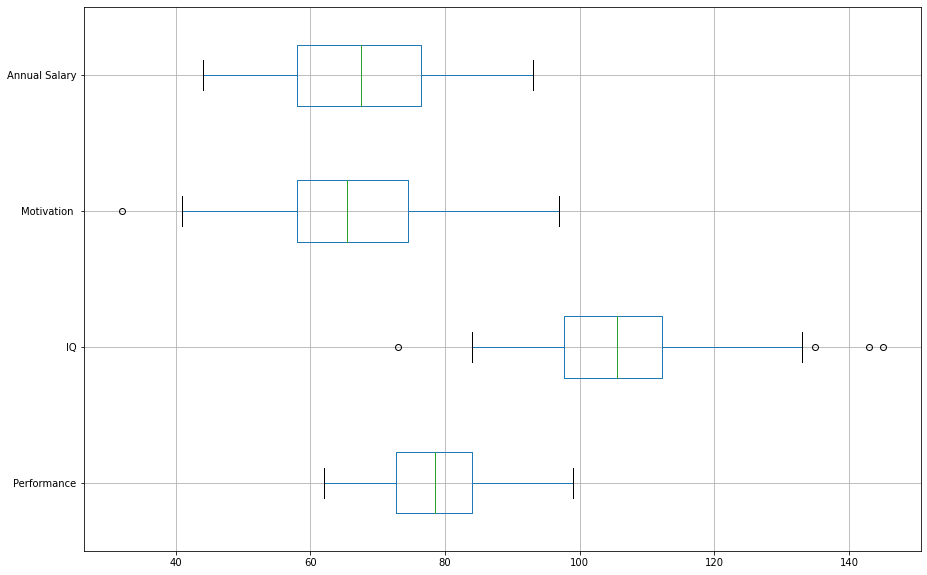

In [8]:
fig=plt.figure(figsize=(15,10))
df.boxplot(vert=False)

In [9]:
def remove_outlier(mydf,col):
    q1=mydf[col].quantile(0.25)
    q3=mydf[col].quantile(0.75)
    IQR=q3-q1
    mydf.loc[mydf[col]>(q3+1.5*IQR),col]=q3
    mydf.loc[mydf[col]<(q1-1.5*IQR),col]=q1
    return mydf

In [10]:
for i in df.drop(['Name','Performance'],axis=1).columns:
    mydf=remove_outlier(df,i)

In [12]:
X=df.drop(['Name','Performance'],axis=1)
y=df['Performance']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [16]:
model=LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(X_test)

In [22]:
r2_score(y_test,y_pred)

0.1577418663078437

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.0839744764975014